# Realised Service

***Realised Service:*** Potential Service that is received by humans

To do this, we need:

- `vector` population layer. Centroids, not polygons
- `raster` reference layer for resolution and crs
- `raster` layer of potential service from previous step 

#### Import libraries

In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import time
from rasterio import features
from rasterio.plot import show
from rasterio import plot

#### Import data

In [12]:
%%time
# Read in the vector data (OGS) and reference raster 
Pop = gpd.read_file("P:/NERC_07901_DEFRAG 2021/GIS/DO/Data/All/Pop/all_pop_centroids_E_EM_SE_2km_buffer_from_built_sites.gpkg")
Ref_Ras = rasterio.open("P:/NERC_07901_DEFRAG 2021/GIS/DO/Data/All/Raster/reference_raster_gspaces_3km_from_built_sites.tif")
Pot_Serv = rasterio.open("../S2_potential_service/potential_service.tif")

CPU times: total: 32.3 s
Wall time: 1min 28s


#### Rasterise vector data

In [13]:
%%time
# Get list of geometries from vector layer
geom = [geom for geom in Pop.geometry]

# Rasterize the Pop layer (binary) and fill any non-Pop cells with 0
Pop_Rast = features.rasterize(geom, out_shape=Ref_Ras.shape, transform=Ref_Ras.transform, fill=0)

CPU times: total: 2.16 s
Wall time: 2.41 s


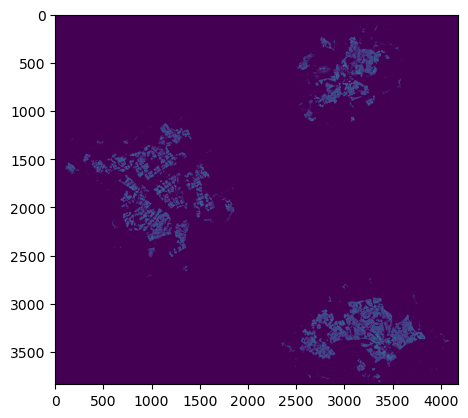

In [14]:
# Visualise rasterised pop data
show(Pop_Rast);

#### Realised service

In [15]:
# Read in the potential service raster as a np array
Pot_Serv_array = Pot_Serv.read(1)

In [22]:
%%time
# Calculate realised service; potential service where there are people (Pop_Rast = 1)
Real_Serv = Pop_Rast * Pot_Serv_array

CPU times: total: 0 ns
Wall time: 28.6 ms


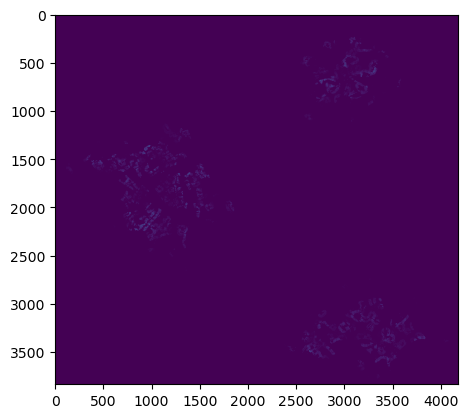

In [24]:
show(Real_Serv);

#### Save Output

In [28]:
# Save this layer as new raster file as it is currently a numpy array (has no refernce to coordinates).
# We will want to save the file and assign it coordinates and a crs. Easiest way to do this is to use a reference raster layer (e.g., Ref Raster)

# Copy the profile of Pop layer (e.g. CRS, extent, etc.)
profile_ref = Ref_Ras.profile

# Write the file
with rasterio.open("realised_service.tif", 'w', **profile_ref) as dst:
     dst.write(Real_Serv, 1)